In [2]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor, StackingRegressor

import pickle
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
import os
import joblib

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

x = pd.read_excel('../data/final_train.xlsx')
y = pd.read_excel('../data/y_train.xlsx')

x.drop(columns = 'ID', inplace= True)
y.drop(columns = 'ID', inplace= True)


np.set_printoptions(formatter={'float_kind':'{:f}'.format})

X_train, X_test, y_train, y_test = train_test_split(x.fillna(0), y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(5600, 171) (1400, 171)
(5600, 1) (1400, 1)


# Finalise Optimised Models in Dictionary

See other notebook for how we reached these hyperparam choices via Grid Search CV

In [2]:
# master_models = {}
# # Linear Reg -------------
# lin_reg = LinearRegression()
# lin_reg.fit(X_train, y_train)
# master_models['Linear Regression'] = lin_reg
# # Lasso Reg -------------
# lasso =  make_pipeline(StandardScaler(),
#                         Lasso(random_state= 42, alpha=20))
# lasso.fit(X_train, y_train)
# master_models['Lasso'] = lasso
# # Ridge Reg -------------
# ridge = make_pipeline(StandardScaler(), 
#                            Ridge(random_state= 42, alpha = 50))
# ridge.fit(X_train, y_train)
# master_models['Ridge'] = ridge
# # Elastic Net -------------
# elastic = make_pipeline(StandardScaler(), 
#                              ElasticNet(random_state= 42, alpha=0.01, l1_ratio = 0.5))
# elastic.fit(X_train, y_train)
# master_models['Elastic Net'] = elastic
# # KNN -------------
# knn = make_pipeline(StandardScaler(),
#                          KNeighborsRegressor(n_neighbors=7))
# knn.fit(X_train, y_train)
# master_models['KNN'] = knn
# # SVR -------------
# svr = make_pipeline(StandardScaler(),
#                          SVR(kernel='rbf', C=2000, gamma=0.001))
# svr.fit(X_train, y_train)
# master_models['SVR'] = svr
# # Decision Tree -------------
# dt = DecisionTreeRegressor(max_depth=6, max_features='auto', min_samples_leaf=4, random_state=42)
# dt.fit(X_train, y_train)
# master_models['Decision Tree'] = dt
# # Random Forest -------------
# rf = RandomForestRegressor(max_depth=7, max_features=20, n_estimators=1200, random_state=42)
# rf.fit(X_train, y_train)
# master_models['Random Forest'] = rf
# # XGBOOST -------------
# xgb = XGBRegressor(max_depth=5, n_estimators=300, random_state=42, learning_rate = 0.1, min_child_weight = 1)
# xgb.fit(X_train, y_train)
# master_models['XGBoost'] = xgb
# # GBM ------------------
# gbm = GradientBoostingRegressor(alpha = 0.5, learning_rate=0.1, max_depth=4, n_estimators=100)
# gbm.fit(X_train, y_train)
# master_models['GBM'] = gbm
# # Light GBM ------------------
# # lgbm = LGBMRegressor(learning_rate=0.1, max_depth=5)
# # lgbm.fit(X_train, y_train)
# # master_models['Light GBM'] = lgbm
# mlp = make_pipeline(StandardScaler(),
#                     MLPRegressor(alpha=0.05, hidden_layer_sizes=(20,),max_iter=500, random_state=1))
# mlp.fit(X_train, y_train)
# master_models['MLP'] = mlp


In [3]:
# ensembles = {}
# # STACK ALL
# estimators = [ ('knn', knn), ('gb', gbm),('xgb_regressor', xgb),('random_forest', rf), 
#               ('decision_tree',dt),('ridge',ridge),('lasso',lasso),('elasticnet',elastic),
#               ('svr',svr),('mlp',mlp),('linear',lin_reg)]
# stack_lr_all = StackingRegressor(estimators=estimators, 
#                                  final_estimator= lin_reg, 
#                                  cv=5, n_jobs= -1, passthrough = False)
# stack_lr_all.fit(X_train, y_train)
# ensembles['Stack All'] = stack_lr_all

# # TOP 5
# estimators2 = [ ('Random Forest', rf), ('gbm', gbm),('xgb_regressor', xgb),('mlp', mlp), ('decision tree', dt)]
# stack_lr_top = StackingRegressor(estimators=estimators2, 
#                                  final_estimator= lin_reg, 
#                                  cv=5, n_jobs= -1, passthrough = False)
# stack_lr_top.fit(X_train, y_train)
# ensembles['Stack Top 5'] = stack_lr_top

# # VOTE ALL
# vote_all = VotingRegressor(estimators=estimators)
# vote_all.fit(X_train, y_train)
# ensembles['Voting All'] = vote_all

# # VOTE TOP 5
# vote_top5 = VotingRegressor(estimators=estimators2)
# vote_top5.fit(X_train, y_train)
# ensembles['Voting Top 5'] = vote_top5

/Users/domnasrabadi/opt/anaconda3/envs/S1_2023/lib/python3.9/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/domnasrabadi/opt/anaconda3/envs/S1_2023/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/domnasrabadi/opt/anaconda3/envs/S1_2023/lib/python3.9/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/domnasrabadi/opt/anaconda3/envs/S1_2023/lib/python3.9/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be

# Dump and Load all Tuned Models

In [22]:
# Saving them
joblib.dump(master_models['Linear Regression'], '../pickled_models/linreg1.pkl')
joblib.dump(master_models['Lasso'], '../pickled_models/lasso1.pkl')
joblib.dump(master_models['Ridge'], '../pickled_models/ridge1.pkl')
joblib.dump(master_models['Elastic Net'], '../pickled_models/elasticnet1.pkl')
joblib.dump(master_models['KNN'], '../pickled_models/knn1.pkl')
joblib.dump(master_models['SVR'], '../pickled_models/svr1.pkl')
joblib.dump(master_models['Decision Tree'], '../pickled_models/dt1.pkl')
joblib.dump(master_models['Random Forest'], '../pickled_models/rf1.pkl')
joblib.dump(master_models['XGBoost'], '../pickled_models/xgb1.pkl')
joblib.dump(master_models['GBM'], '../pickled_models/gbm1.pkl')
joblib.dump(master_models['MLP'], '../pickled_models/mlp1.pkl')

joblib.dump(ensembles['Stack All'], '../pickled_models/stack_lr_all.pkl')
joblib.dump(ensembles['Stack Top 5'], '../pickled_models/stack_top_5.pkl')
joblib.dump(ensembles['Voting All'], '../pickled_models/voting_all.pkl')
joblib.dump(ensembles['Voting Top 5'], '../pickled_models/voting_top_5.pkl')

['../pickled_models/voting_top_5.pkl']

In [3]:
# Loading to save time
loaded_single_models = {}
loaded_single_models['Linear Regression'] = joblib.load('../pickled_models/linreg1.pkl')
loaded_single_models['Lasso'] = joblib.load('../pickled_models/lasso1.pkl')
loaded_single_models['Ridge'] = joblib.load('../pickled_models/ridge1.pkl')
loaded_single_models['Elastic Net'] = joblib.load('../pickled_models/elasticnet1.pkl')
loaded_single_models['KNN'] = joblib.load('../pickled_models/knn1.pkl')
loaded_single_models['SVR'] = joblib.load('../pickled_models/svr1.pkl')
loaded_single_models['Decision Tree'] = joblib.load('../pickled_models/dt1.pkl')
loaded_single_models['Random Forest'] = joblib.load('../pickled_models/rf1.pkl')
loaded_single_models['XGBoost'] = joblib.load('../pickled_models/xgb1.pkl')
loaded_single_models['GBM'] = joblib.load('../pickled_models/gbm1.pkl')
loaded_single_models['MLP'] = joblib.load('../pickled_models/mlp1.pkl')

loaded_ensemble = {}
loaded_ensemble['Stack All'] = joblib.load('../pickled_models/stack_lr_all.pkl')
loaded_ensemble['Stack Top 5'] = joblib.load('../pickled_models/stack_top_5.pkl')
loaded_ensemble['Voting All'] = joblib.load('../pickled_models/voting_all.pkl')
loaded_ensemble['Voting Top 5'] = joblib.load('../pickled_models/voting_top_5.pkl')

# Evaluate All Models

In [5]:
#combined = loaded_single_models.update(loaded_ensemble)
model_names = []
train_mae = []
train_mse = []
train_rmse = []
train_r2 = []
test_mae = []
test_mse = []
test_rmse = []
test_r2 = []

for i in loaded_single_models.items():
    model_names.append(i[0])
    train_preds = i[1].predict(X_train)
    test_preds = i[1].predict(X_test)

    train_mae.append(mean_absolute_error(y_train, train_preds))
    train_mse.append(mean_squared_error(y_train, train_preds))
    train_rmse.append(math.sqrt(mean_squared_error(y_train, train_preds)))
    train_r2.append(r2_score(y_train, train_preds))
    test_mae.append(mean_absolute_error(y_test, test_preds))
    test_mse.append(mean_squared_error(y_test, test_preds))
    test_rmse.append(math.sqrt(mean_squared_error(y_test, test_preds)))
    test_r2.append(r2_score(y_test, test_preds))

single_df = pd.DataFrame({
    'Model':model_names,
    'Train MAE':train_mae,
    'Train MSE':train_mse,
    'Train RMSE':train_rmse,
    'Train R2':train_r2,
    'Test MAE':test_mae,
    'Test MSE':test_mse,
    'Test RMSE':test_rmse,
    'Test R2':test_r2
})

In [6]:
model_names = []
train_mae = []
train_mse = []
train_rmse = []
train_r2 = []
test_mae = []
test_mse = []
test_rmse = []
test_r2 = []

for i in loaded_ensemble.items():
    model_names.append(i[0])
    train_preds = i[1].predict(X_train)
    test_preds = i[1].predict(X_test)

    train_mae.append(mean_absolute_error(y_train, train_preds))
    train_mse.append(mean_squared_error(y_train, train_preds))
    train_rmse.append(math.sqrt(mean_squared_error(y_train, train_preds)))
    train_r2.append(r2_score(y_train, train_preds))
    test_mae.append(mean_absolute_error(y_test, test_preds))
    test_mse.append(mean_squared_error(y_test, test_preds))
    test_rmse.append(math.sqrt(mean_squared_error(y_test, test_preds)))
    test_r2.append(r2_score(y_test, test_preds))

ensemble_df = pd.DataFrame({
    'Model':model_names,
    'Train MAE':train_mae,
    'Train MSE':train_mse,
    'Train RMSE':train_rmse,
    'Train R2':train_r2,
    'Test MAE':test_mae,
    'Test MSE':test_mse,
    'Test RMSE':test_rmse,
    'Test R2':test_r2
})

In [7]:
df = pd.concat([single_df, ensemble_df]).reset_index().drop(columns=['index']).round(2)
df

,Model,Train MAE,Train MSE,Train RMSE,Train R2,Test MAE,Test MSE,Test RMSE,Test R2
0,Linear Regression,122.31,44151.44,210.12,0.62,127.76,45125.23,212.43,0.60
1,Lasso,118.11,52413.80,228.94,0.55,122.53,51467.71,226.86,0.54
2,Ridge,121.45,44349.84,210.59,0.62,126.58,45108.64,212.39,0.60
3,Elastic Net,121.66,44286.14,210.44,0.62,126.85,45082.53,212.33,0.60
4,KNN,92.62,38310.76,195.73,0.67,109.12,50655.77,225.07,0.55
5,SVR,64.33,33667.31,183.49,0.71,88.28,37771.45,194.35,0.66
6,Decision Tree,89.96,29580.33,171.99,0.74,108.02,49359.53,222.17,0.56
7,Random Forest,83.75,21873.13,147.90,0.81,99.54,39450.59,198.62,0.65
8,XGBoost,37.73,3410.31,58.40,0.97,87.60,32339.47,179.83,0.71
9,GBM,63.70,11335.11,106.47,0.90,89.07,31544.11,177.61,0.72


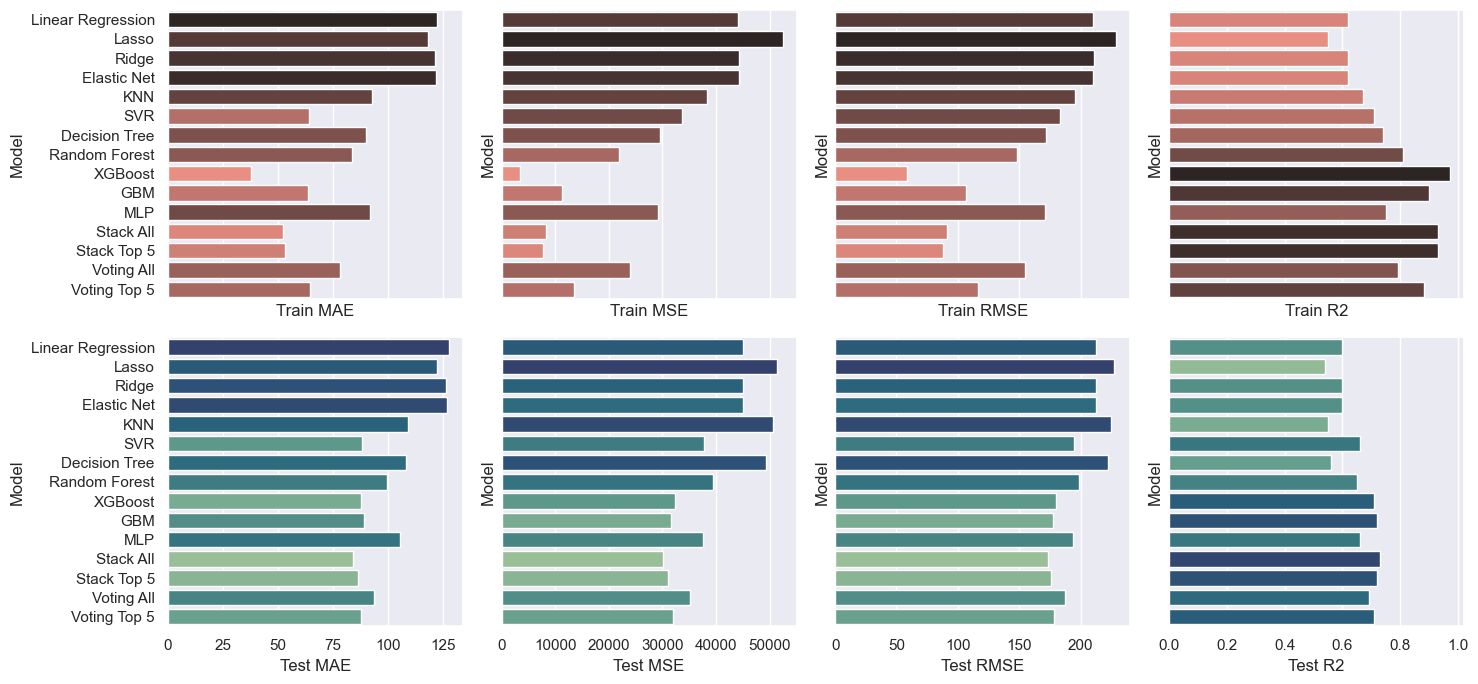

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(15, 7), sharey=True, sharex='col')
axes = axes.flatten()

sns.barplot(data=df, y = 'Model', x = 'Train MAE', palette= 'dark:salmon_r', hue = 'Train MAE', dodge=False, ax=axes[0])
sns.barplot(data=df, y = 'Model', x = 'Train MSE', palette= 'dark:salmon_r', hue = 'Train MSE', dodge=False, ax=axes[1])
sns.barplot(data=df, y = 'Model', x = 'Train RMSE', palette= 'dark:salmon_r', hue = 'Train RMSE', dodge=False, ax=axes[2])
sns.barplot(data=df, y = 'Model', x = 'Train R2', palette= 'dark:salmon_r', hue = 'Train R2', dodge=False, ax=axes[3])
sns.barplot(data=df, y = 'Model', x = 'Test MAE', palette= 'crest', hue = 'Test MAE', dodge=False, ax=axes[4])
sns.barplot(data=df, y = 'Model', x = 'Test MSE', palette= 'crest', hue = 'Test MSE', dodge=False, ax=axes[5])
sns.barplot(data=df, y = 'Model', x = 'Test RMSE', palette= 'crest', hue = 'Test RMSE', dodge=False, ax=axes[6])
sns.barplot(data=df, y = 'Model', x = 'Test R2', palette= 'crest', hue = 'Test R2', dodge=False, ax=axes[7])

for i in range(8):
    axes[i].get_legend().remove()
fig.tight_layout()
plt.show()

In [21]:
model_names = []
fit_time = []
train_mae = []
train_mse = []
train_rmse = []
train_r2 = []
test_mae = []
test_mse = []
test_rmse = []
test_r2 = []
metrics = ('neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2')

for i in loaded_single_models.items():
    model_names.extend([i[0]]*5)
    model = i[1]
    train_cv = cross_validate(estimator = model , X = X_train, y = y_train, cv = 5, scoring=metrics)
    
    fit_time.extend(train_cv['fit_time'])
    train_mae.extend(train_cv['test_neg_mean_absolute_error'])
    train_mse.extend(train_cv['test_neg_mean_squared_error'])
    train_rmse.extend(train_cv['test_neg_root_mean_squared_error'])
    train_r2.extend(train_cv['test_r2'])
    # test_mae.append(mean_absolute_error(y_test, test_preds))
    # test_mse.append(mean_squared_error(y_test, test_preds))
    # test_rmse.append(math.sqrt(mean_squared_error(y_test, test_preds)))
    # test_r2.append(r2_score(y_test, test_preds))

single_cv_df = pd.DataFrame({
    'Model':model_names,
    'Train MAE':train_mae,
    'Train MSE':train_mse,
    'Train RMSE':train_rmse,
    'Train R2':train_r2, 
    'Fit Time':fit_time
    # 'Test MAE':test_mae,
    # 'Test MSE':test_mse,
    # 'Test RMSE':test_rmse,
    # 'Test R2':test_r2
})

ValueError: All arrays must be of the same length

In [33]:
model_names = []
for i in loaded_single_models.items():
    model_names.extend([i[0]] * 5)

single_cv_df = pd.DataFrame({
    'Model':model_names,
    'Train MAE':train_mae,
    'Train MSE':train_mse,
    'Train RMSE':train_rmse,
    'Train R2':train_r2, 
    'Fit Time':fit_time
})

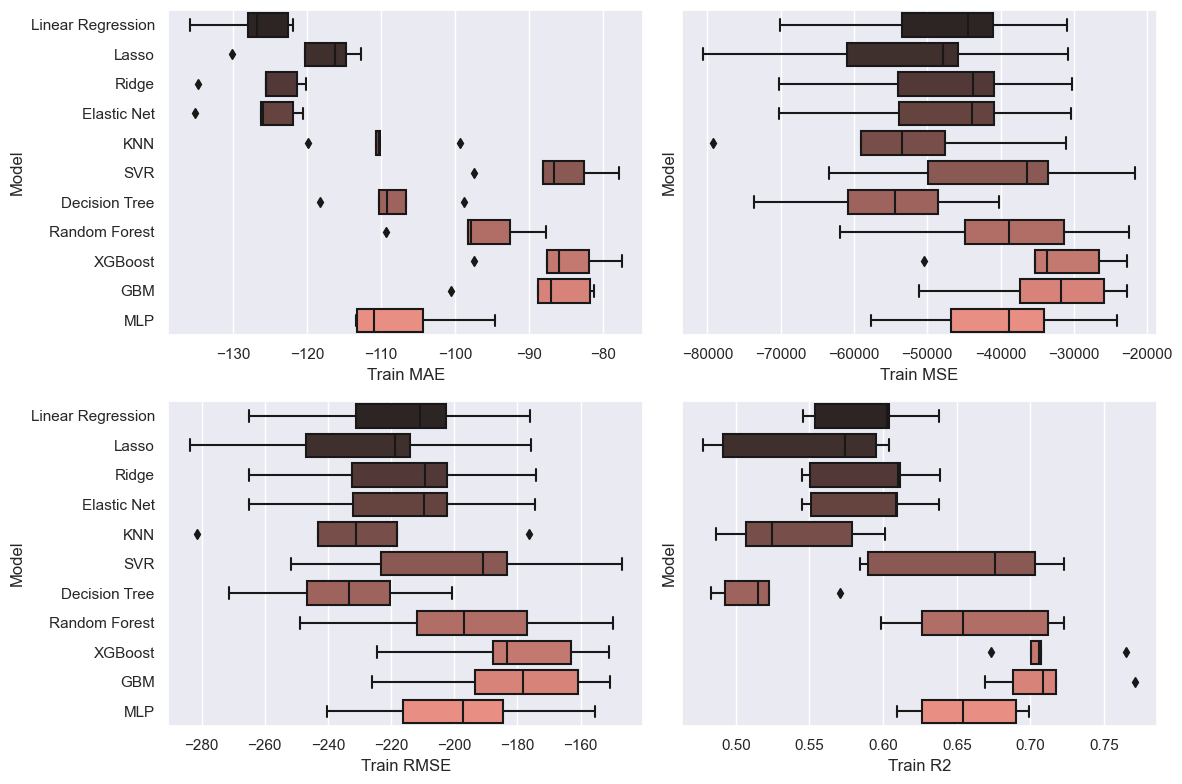

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
axes = axes.flatten()

sns.boxplot(data=single_cv_df, y = 'Model', x = 'Train MAE', palette= 'dark:salmon', dodge=False, ax=axes[0])
sns.boxplot(data=single_cv_df, y = 'Model', x = 'Train MSE', palette= 'dark:salmon', dodge=False, ax=axes[1])
sns.boxplot(data=single_cv_df, y = 'Model', x = 'Train RMSE', palette= 'dark:salmon', dodge=False, ax=axes[2])
sns.boxplot(data=single_cv_df, y = 'Model', x = 'Train R2', palette= 'dark:salmon', dodge=False, ax=axes[3])
#sns.boxplot(data=single_cv_df, y = 'Model', x = 'Fit Time', palette= 'crest', dodge=False, ax=axes[5])

fig.tight_layout()
plt.show()

# No Feature Engineering Model Comparison

In [4]:
x_og_train = pd.read_csv('../data/raw_train.csv')
# drop text or useless cols
cols_to_drop = ['ID','price', 'description','name', 'neighborhood_overview', 'host_name',
                'host_location','host_about','host_neighbourhood','host_verifications',
                'neighbourhood','property_type','amenities','license']
x_og_train.drop(columns = cols_to_drop, inplace=True)
# format percentages 
x_og_train['host_response_rate'] = x_og_train['host_response_rate'].str.rstrip('%').astype('float') / 100.0
x_og_train['host_acceptance_rate'] = x_og_train['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0
# map binary columns appropriately
x_og_train['host_is_superhost'] = x_og_train['host_is_superhost'].map({'f':0, 't':1})
x_og_train['host_has_profile_pic'] = x_og_train['host_has_profile_pic'].map({'f':0, 't':1})
x_og_train['host_identity_verified'] = x_og_train['host_identity_verified'].map({'f':0, 't':1})
x_og_train['has_availability'] = x_og_train['has_availability'].map({'f':0, 't':1})
x_og_train['instant_bookable'] = x_og_train['instant_bookable'].map({'f':0, 't':1})
# map date columns appropriately 
x_og_train['host_since_year'] = pd.to_datetime(x_og_train['host_since']).dt.year
x_og_train['host_since'] = -(pd.to_datetime(x_og_train['host_since']) -  pd.to_datetime("now")).dt.days
x_og_train['first_review'] = -(pd.to_datetime(x_og_train['first_review']) -  pd.to_datetime("now")).dt.days
x_og_train['last_review'] = -(pd.to_datetime(x_og_train['last_review']) -  pd.to_datetime("now")).dt.days
# clean bathroom column and convert to float
x_og_train['bathrooms'] = x_og_train['bathrooms'].str.extract(r'(\d+(?:\.\d+)?)').astype('float')
# imputing missing cols with common sense substitution from other column
x_og_train['minimum_minimum_nights'] = x_og_train['minimum_minimum_nights'].fillna(x_og_train['minimum_nights'])
x_og_train['maximum_maximum_nights'] = x_og_train['maximum_maximum_nights'].fillna(x_og_train['maximum_nights'])
x_og_train['availability_365'] = x_og_train['availability_365'].fillna(x_og_train['availability_90']*4) # can also fiddle with just 1 instead of 4 (did analysis)
x_og_train = pd.get_dummies(x_og_train).fillna(0)

In [18]:
without_fe_models = {}
# Linear Reg -------------
lin_reg = LinearRegression()
lin_reg.fit(x_og_train, y)
without_fe_models['Linear Regression'] = lin_reg
# Lasso Reg -------------
lasso =  make_pipeline(StandardScaler(),
                        Lasso(random_state= 42, alpha=20))
lasso.fit(x_og_train, y)
without_fe_models['Lasso'] = lasso
# Ridge Reg -------------
ridge = make_pipeline(StandardScaler(), 
                           Ridge(random_state= 42, alpha = 50))
ridge.fit(x_og_train, y)
without_fe_models['Ridge'] = ridge
# Elastic Net -------------
elastic = make_pipeline(StandardScaler(), 
                             ElasticNet(random_state= 42, alpha=0.01, l1_ratio = 0.5))
elastic.fit(x_og_train, y)
without_fe_models['Elastic Net'] = elastic
# KNN -------------
knn = make_pipeline(StandardScaler(),
                         KNeighborsRegressor(n_neighbors=7))
knn.fit(x_og_train, y)
without_fe_models['KNN'] = knn
# SVR -------------
svr = make_pipeline(StandardScaler(),
                         SVR(kernel='rbf', C=2000, gamma=0.001))
svr.fit(x_og_train, y)
without_fe_models['SVR'] = svr
# Decision Tree -------------
dt = DecisionTreeRegressor(max_depth=6, max_features='auto', min_samples_leaf=4, random_state=42)
dt.fit(x_og_train, y)
without_fe_models['Decision Tree'] = dt
# Random Forest -------------
rf = RandomForestRegressor(max_depth=7, max_features=20, n_estimators=1200, random_state=42)
rf.fit(x_og_train, y)
without_fe_models['Random Forest'] = rf
# XGBOOST -------------
xgb = XGBRegressor(max_depth=5, n_estimators=300, random_state=42, learning_rate = 0.1, min_child_weight = 1)
xgb.fit(x_og_train, y)
without_fe_models['XGBoost'] = xgb
# GBM ------------------
gbm = GradientBoostingRegressor(alpha = 0.5, learning_rate=0.1, max_depth=4, n_estimators=100)
gbm.fit(x_og_train, y)
without_fe_models['GBM'] = gbm
# MLP --------------------
mlp = make_pipeline(StandardScaler(),
                    MLPRegressor(alpha=0.05, hidden_layer_sizes=(20,),max_iter=500, random_state=1))
mlp.fit(x_og_train, y)
without_fe_models['MLP'] = mlp


# STACK ALL
estimators = [ ('knn', knn), ('gb', gbm),('xgb_regressor', xgb),('random_forest', rf), 
              ('decision_tree',dt),('ridge',ridge),('lasso',lasso),('elasticnet',elastic),
              ('svr',svr),('mlp',mlp),('linear',lin_reg)]
stack_lr_all = StackingRegressor(estimators=estimators, 
                                 final_estimator= lin_reg, 
                                 cv=5, n_jobs= -1, passthrough = False)
stack_lr_all.fit(x_og_train, y)
without_fe_models['Stack All'] = stack_lr_all

# TOP 5
estimators2 = [ ('Random Forest', rf), ('gbm', gbm),('xgb_regressor', xgb),('mlp', mlp), ('decision tree', dt)]
stack_lr_top = StackingRegressor(estimators=estimators2, 
                                 final_estimator= lin_reg, 
                                 cv=5, n_jobs= -1, passthrough = False)
stack_lr_top.fit(x_og_train, y)
without_fe_models['Stack Top 5'] = stack_lr_top

# VOTE ALL
vote_all = VotingRegressor(estimators=estimators)
vote_all.fit(x_og_train, y)
without_fe_models['Voting All'] = vote_all

# VOTE TOP 5
vote_top5 = VotingRegressor(estimators=estimators2)
vote_top5.fit(x_og_train, y)
without_fe_models['Voting Top 5'] = vote_top5

/Users/domnasrabadi/opt/anaconda3/envs/S1_2023/lib/python3.9/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/domnasrabadi/opt/anaconda3/envs/S1_2023/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/domnasrabadi/opt/anaconda3/envs/S1_2023/lib/python3.9/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/domnasrabadi/opt/anaconda3/envs/S1_2023/lib/python3.9/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be

In [19]:
# Saving them
joblib.dump(without_fe_models['Linear Regression'], '../pickled_models/wo_fe//linreg1.pkl')
joblib.dump(without_fe_models['Lasso'], '../pickled_models/wo_fe/lasso1.pkl')
joblib.dump(without_fe_models['Ridge'], '../pickled_models/wo_fe/ridge1.pkl')
joblib.dump(without_fe_models['Elastic Net'], '../pickled_models/wo_fe/elasticnet1.pkl')
joblib.dump(without_fe_models['KNN'], '../pickled_models/wo_fe/knn1.pkl')
joblib.dump(without_fe_models['SVR'], '../pickled_models/wo_fe/svr1.pkl')
joblib.dump(without_fe_models['Decision Tree'], '../pickled_models/wo_fe/dt1.pkl')
joblib.dump(without_fe_models['Random Forest'], '../pickled_models/wo_fe/rf1.pkl')
joblib.dump(without_fe_models['XGBoost'], '../pickled_models/wo_fe/xgb1.pkl')
joblib.dump(without_fe_models['GBM'], '../pickled_models/wo_fe/gbm1.pkl')
joblib.dump(without_fe_models['MLP'], '../pickled_models/wo_fe/mlp1.pkl')

joblib.dump(without_fe_models['Stack All'], '../pickled_models/wo_fe/stack_lr_all.pkl')
joblib.dump(without_fe_models['Stack Top 5'], '../pickled_models/wo_fe/stack_top_5.pkl')
joblib.dump(without_fe_models['Voting All'], '../pickled_models/wo_fe/voting_all.pkl')
joblib.dump(without_fe_models['Voting Top 5'], '../pickled_models/wo_fe/voting_top_5.pkl')

['../pickled_models/wo_fe/voting_top_5.pkl']

In [22]:
model_names = []
train_mae = []
train_mse = []
train_rmse = []
train_r2 = []
test_mae = []
test_mse = []
test_rmse = []
test_r2 = []

for i in without_fe_models.items():
    model_names.append(i[0])
    train_preds = i[1].predict(x_og_train)
    test_preds = i[1].predict(x_og_train)

    train_mae.append(mean_absolute_error(y, train_preds))
    train_mse.append(mean_squared_error(y, train_preds))
    train_rmse.append(math.sqrt(mean_squared_error(y, train_preds)))
    train_r2.append(r2_score(y, train_preds))
    # test_mae.append(mean_absolute_error(y, test_preds))
    # test_mse.append(mean_squared_error(y, test_preds))
    # test_rmse.append(math.sqrt(mean_squared_error(y, test_preds)))
    # test_r2.append(r2_score(y, test_preds))

combined_df = pd.DataFrame({
    'Model':model_names,
    'Train MAE':train_mae,
    'Train MSE':train_mse,
    'Train RMSE':train_rmse,
    'Train R2':train_r2
    # 'Test MAE':test_mae,
    # 'Test MSE':test_mse,
    # 'Test RMSE':test_rmse,
    # 'Test R2':test_r2
})
combined_df

,Model,Train MAE,Train MSE,Train RMSE,Train R2
0,Linear Regression,125.699858,49195.341021,221.800228,0.571382
1,Lasso,124.882936,56259.687448,237.191247,0.509833
2,Ridge,125.163941,49249.217314,221.921647,0.570912
3,Elastic Net,125.278592,49233.014931,221.885139,0.571053
4,KNN,91.583714,36841.446437,191.941258,0.679016
5,SVR,85.075612,43663.296311,208.957642,0.619580
6,Decision Tree,94.895409,30732.402199,175.306595,0.732242
7,Random Forest,86.246129,22912.135473,151.367551,0.800376
8,XGBoost,44.508995,4936.898791,70.263068,0.956987
9,GBM,71.112703,14925.927596,122.171714,0.869957
